# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 


In [2]:
import main

A_10, b_10 = main.random_matrix_Ab(10)
A_20, b_20 = main.random_matrix_Ab(20)
A_50, b_50 = main.random_matrix_Ab(50)
A_100, b_100 = main.random_matrix_Ab(100)
A_1000, b_1000 = main.random_matrix_Ab(1000)

***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  

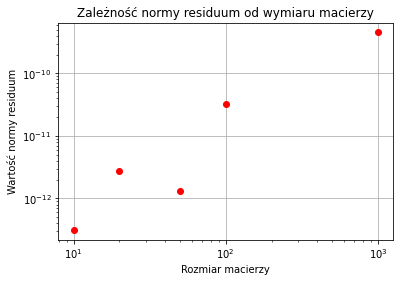

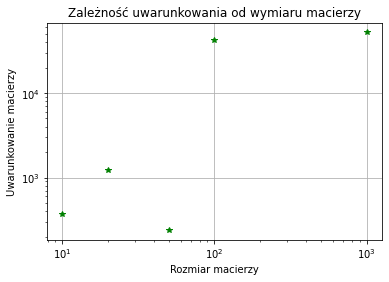

In [3]:
from numpy import linalg as LA

rozmiary_macierzy = [10, 20, 50, 100, 10**3]
norma_residuum = []
uwarunkowanie_macierzy = []

for i in rozmiary_macierzy: 
    A, b = main.random_matrix_Ab(i)
    x = np.linalg.solve(A, b)
    norma_residuum.append(main.residual_norm(A, x, b))
    uwarunkowanie_macierzy.append(LA.cond(A))

fig, ax1 = plt.subplots(1, 1)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.grid()
ax1.set_xlabel('Rozmiar macierzy')
ax1.set_ylabel('Wartość normy residuum')
ax1.set_title('Zależność normy residuum od wymiaru macierzy')
ax1.plot(rozmiary_macierzy, norma_residuum, 'ro')

fig, ax2 = plt.subplots(1, 1)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.grid()
ax2.set_xlabel('Rozmiar macierzy')
ax2.set_ylabel('Uwarunkowanie macierzy')
ax2.set_title('Zależność uwarunkowania od wymiaru macierzy')
ax2.plot(rozmiary_macierzy, uwarunkowanie_macierzy, 'g*')

Z otrzymanych wykresów możemy zauważyć, że rozmiar macierzy ma wpływ no normę residuum oraz uwarunkowanie macierzy.
Im większy rozmiar macierzy tym większa wartość normy residuum (jednak i tak jest to dosyć mała liczba) oraz większa wartość uwarunkowania macierzy.
Zgodnie z tym możememy stwierdzić, że im większy wymiar macierzy tym mniej dokładne rozwiązanie. 

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [4]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




In [59]:
rozmiary_macierzy = [10, 20, 50, 100, 10**3]

normal_uwarunkowanie = []
max_uwarunkowanie = []
min_uwarunkowanie = []

normal_residuum = []
max_residuum = []
min_residuum = []

for i in rozmiary_macierzy: 
    A, b = main.random_matrix_Ab(i) 
    normal_singular_values_vector = main.log_sing_value(i, 1, 10)
    max_singular_vector = main.order_sing_value(i, 2, "gre")
    min_singular_vector = main.order_sing_value(i, 2, "low")
    
    #Resiidum i uwarunkowanie dla wektora nierosnących wartości singularnych 
    normal_ = main.create_matrix_from_A(A, normal_singular_values_vector)
    normal_uwarunkowanie.append(LA.cond(normal_))
    x_ = np.linalg.solve(normal_, b)
    normal_residuum.append(main.residual_norm(normal_, x_, b))
    
    #Resiidum i uwarunkowanie dla wektora nierosnących wartości singularnych, z 1 zdecydowanie większą
    max_ = main.create_matrix_from_A(A, max_singular_vector)
    max_uwarunkowanie.append(LA.cond(max_))
    x_1 = np.linalg.solve(max_, b)
    max_residuum.append(main.residual_norm(max_, x_1, b))
    
    #Resiidum i uwarunkowanie dla wektora nierosnących wartości singularnych, z 1 zdecydowanie mniejszą
    min_ = main.create_matrix_from_A(A, min_singular_vector)
    min_uwarunkowanie.append(LA.cond(min_))
    x_2 = np.linalg.solve(min_, b)
    min_residuum.append(main.residual_norm(min_, x_2, b))

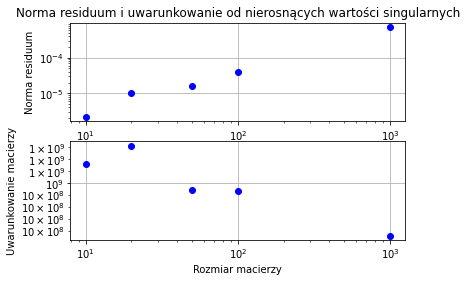

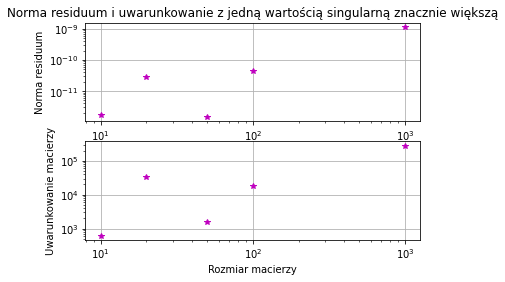

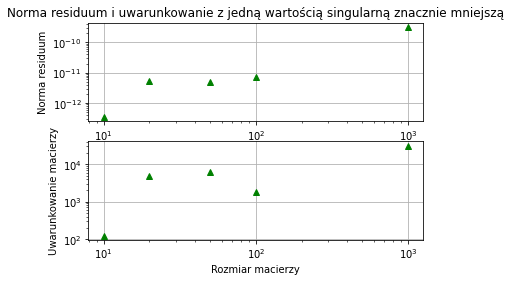

In [63]:
#Norma residuum i uwarunkowanie dla nierosnący wartości singularnych

fig, (ax, ax2) = plt.subplots(2, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax.grid()
ax2.grid()
ax.set_title('Norma residuum i uwarunkowanie od nierosnących wartości singularnych')
ax2.set_xlabel('Rozmiar macierzy')
ax2.set_ylabel('Uwarunkowanie macierzy')
ax.set_ylabel('Norma residuum')
ax.plot(rozmiary_macierzy, normal_residuum, 'bo')
ax2.plot(rozmiary_macierzy, normal_uwarunkowanie, 'bo')

#Norma residuum i uwarunkowanie z jedną wartością singularną znacznie większą
fig, (ax, ax2) = plt.subplots(2, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax.grid()
ax2.grid()
ax.set_title('Norma residuum i uwarunkowanie z jedną wartością singularną znacznie większą')
ax2.set_xlabel('Rozmiar macierzy')
ax2.set_ylabel('Uwarunkowanie macierzy')
ax.set_ylabel('Norma residuum')
ax.plot(rozmiary_macierzy, max_residuum, 'm*')
ax2.plot(rozmiary_macierzy, max_uwarunkowanie, 'm*')

#Norma residuum i uwarunkowanie z jedną wartością singularną znacznie mniejsza
fig, (ax, ax2) = plt.subplots(2, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax.grid()
ax2.grid()
ax.set_title('Norma residuum i uwarunkowanie z jedną wartością singularną znacznie mniejszą')
ax2.set_xlabel('Rozmiar macierzy')
ax2.set_ylabel('Uwarunkowanie macierzy')
ax.set_ylabel('Norma residuum')
ax.plot(rozmiary_macierzy, min_residuum, 'g^')
ax2.plot(rozmiary_macierzy, min_uwarunkowanie, 'g^')

In [70]:
wsp_normal = normal_singular_values_vector[0]/normal_singular_values_vector[-1]
wsp_max = max_singular_vector[0]/max_singular_vector[-1]
wsp_min = min_singular_vector[0]/min_singular_vector[-1]

print('Wartośći współczynnika uwarunkowania macierzy dla rozmiaru 1 000 x 1 000')
print('\n')
print(f'Dla nierosnących wartości singularnych:                       {wsp_normal}')
print(f'Dla wartości singularnych gdzie jedna jest znacznie większa:  {wsp_max:.2f}')
print(f'Dla wartości singularnych gdzie jedna jest znacznie mniejsza: {wsp_min:.2f}')

Wartośći współczynnika uwarunkowania macierzy dla rozmiaru 1 000 x 1 000


Dla nierosnących wartości singularnych:                       1e-09
Dla wartości singularnych gdzie jedna jest znacznie większa:  280950.25
Dla wartości singularnych gdzie jedna jest znacznie mniejsza: 31374.28


Odpowiedź na pytanie 4: 
Nie musimy wyliczać macierzy aby wyznaczyć jej współczynnik uwarunkowania ponieważ jest to iloraz największej wartości singularnej przez najmniejszą.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)